# Исследование данных о продаже компьютерных и видеоигр

**Цель исследования**<br>
Для планирования рекламной компании интернет-магазина по продаже игр на 2017 год необходимо выявить закономерности, определяющие успешность игры.<br>
Определить, как влияют на продажи игры следубщие параметры:
- Игровая платформа
- Жанр игры
- Оценки пользователей и критиков
- Возрастной рейтинг игры

**Ход исследования**
1. Изучение общей информации о данных
1. Подготовка данных. Работа с пропусками и дубликатами.
2. Исследование влияния игровой платформы, жанра игры, отзывов пользователей и критиков на продажи.
4. Исследование влияния жанра и рейтинга игры на продажи в различных регионах мира.
5. Проверка гипотез

### Изучение общей информации о данных 

In [1]:
# Импортируем библиотеки
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Создаём датасет из csv-файла
data = pd.read_csv('games.csv')

In [3]:
# Выводим первые 10 строк датасета
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Выводим случайные 10 строк датасета
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11243,Assassin's Creed Chronicles,PS4,2016.0,Action,0.01,0.05,0.01,0.01,NaN,6.1,T
6237,Mobile Suit Gundam Side Story I: Senritsu no Blue,SAT,1996.0,Shooter,0.00,0.00,0.28,0.00,NaN,NaN,NaN
9822,NFL QB Club 2001,N64,2000.0,Sports,0.11,0.01,0.00,0.00,NaN,NaN,NaN
2498,Tales of the Abyss,3DS,2011.0,Role-Playing,0.43,0.19,0.14,0.06,75.0,7.6,T
6345,Mat Hoffman's Pro BMX,GBA,2001.0,Sports,0.19,0.07,0.00,0.00,71.0,tbd,E
11063,Go Play: City Sports,Wii,2009.0,Sports,0.08,0.00,0.00,0.01,NaN,tbd,E
7165,Crazy Climber,2600,1981.0,Action,0.21,0.01,0.00,0.00,NaN,NaN,NaN
16473,Myst,PSP,2006.0,Adventure,0.00,0.01,0.00,0.00,69.0,4.8,E
760,The Sims: House Party,PC,2001.0,Simulation,1.23,0.83,0.00,0.10,74.0,7.9,T
5800,Slot Machine,2600,NaN,Action,0.29,0.02,0.00,0.00,NaN,NaN,NaN


In [5]:
# Получаем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Выводим числовую информацию о данных
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


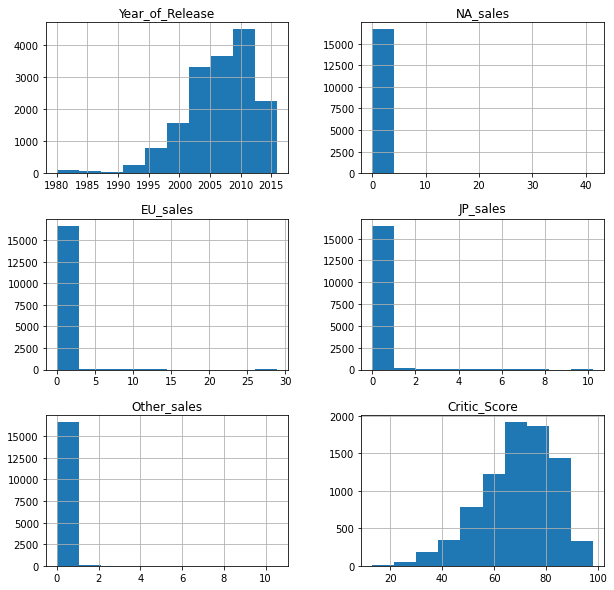

In [7]:
# Строим гистограммы столбцов
data.hist(figsize=(10, 10));

### Подготовка данных

In [8]:
# Выводим количество пропусков
pd.DataFrame(data.isna().mean()).style.background_gradient('coolwarm')

,0
Name,0.000120
Platform,0.000000
Year_of_Release,0.016093
Genre,0.000120
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,0.513192
User_Score,0.400897


**Вывод**: пропуски в столбцах 'Name', 'Genre' и 'Year_of_Release' удаляем, т.к. их доля очень мала.<br>
Пропуски в столбцах 'Critic_score' и 'User_score' оставляем без изменений. Можно было бы заполнить пропуски в этих столбцах медианой по жанрам, но может быть такая ситуация, что у какого-нибудь жанра рейтинг будет только у самых популярных и высоко оценённых игр, в то время как большинство игр данного жанра имеют низкий ретинг.<br>
Пропуски в столбце 'Rating' заполняем значением "Отсутствует", т.к. по-другому заполнить их не предоставляется возможным.<br>

Причины пропусков в столбцах 'Critic_Score' и 'User_Score':<br>
- Игра была выпущена давно
- Игра выпущена недавно и её ещё не успели оценить, характерно для игр с околонулевыми показателями продаж
- Игра оказалась непопулярной и плохо продалась, характерно для игр с околонулевыми показателями продаж<br>
- Игра предназанчена для детей, и критики и пользователи просто не стали её оценивать<br><br>
Причина пропусков в столбце 'Rating' - не был присвоен рейтинг 

In [9]:
# Удаляем пропуски в столбцах Name', 'Genre' и 'Year_of_Release'
data.dropna(subset=['Name', 'Genre', 'Year_of_Release'], inplace=True)

In [10]:
# Приводим тип данных столбца 'Year_of_Release' к типу int
data['Year_of_Release'] = data['Year_of_Release'].astype('int')

In [11]:
# Приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

**Обработка пропусков столбца 'user_score'**

In [12]:
#Выводим уникальные значения столбца 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tdb', вероятно, означает 'to be determined' - "пока не определено". Заменим это значение на пустое

In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [14]:
#Преобразуем тип данных в столбце 'user_score' во float
data['user_score'] = pd.to_numeric(data['user_score'])

**Обработка пропусков столбца 'rating'**

In [15]:
#Заменяем пустые значения в столбце 'rating' на 'Отсутствует'
data.loc[data['rating'].isna(), 'rating'] = 'Отсутствует'

**Работа с дубликатами данных**

In [16]:
#Проверка на неявные дубликаты столбца 'platform'
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Вывод**: неявных дубликатов не обнаружено

In [17]:
#Проверка на неявные дубликаты столбца 'genre'
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Вывод**: неявных дубликатов не обнаружено

In [18]:
#Проверка на неявные дубликаты столбца 'rating'
data['rating'].unique()

array(['E', 'Отсутствует', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Заменим устаревшее значение 'K-A' на 'E'

In [19]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [20]:
#Проверка на явные дубликаты
data.duplicated().sum()

0

**Вывод**: явных дубликатов не обнаружено

**Считаем суммарные продажи во всех регионах**

In [21]:
#Добавляем в даатсет новый столбец с суммарными продажами во всех регионах
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Исследовательский анализ данных

In [22]:
#Вывод датасет для удобства
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Отсутствует,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Отсутствует,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Отсутствует,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Отсутствует,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Отсутствует,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Отсутствует,0.01


**Посмотрим, сколько игр выпускалось в разные годы**

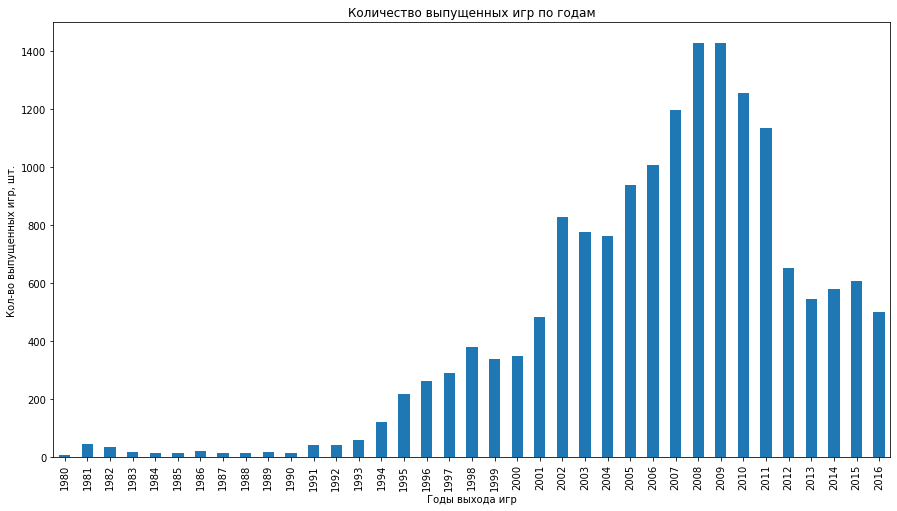

In [23]:
#Создаём сводную таблицу
data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().plot(kind='bar', x='year_of_release', y='name', title='Количество выпущенных игр по годам', xlabel='Годы выхода игр', ylabel='Кол-во выпущенных игр, шт.', legend=False, figsize=(15, 8));

**Вывод**: начиная с 1994 года наблюдается быстрое увеличение выпуска игр с каждым годом. Пик количества выпущенных игр приходится на 2008 и 2009 года. Затем следует довольно резкйи спад с каждым годом. В настоящий момент (2016 год) количество выпущенных игр вернулось на показатели 2001 года.

**Как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и пострим распределение по годам.**

In [24]:
#Сортируем платформы в порядке убывания максимальных продаж за все годы
data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).reset_index()

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Для дальнейшего анализа выбираем первые 11 платформ.

In [25]:
#Создаём список с названиями первых 11 платформ с наибольшими продажами
max_sales = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).reset_index()[:11]['platform'].to_list()

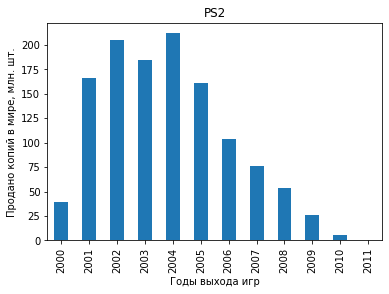

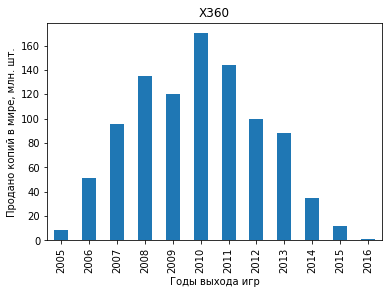

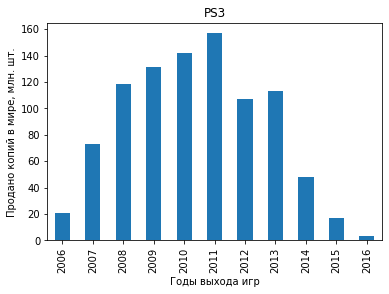

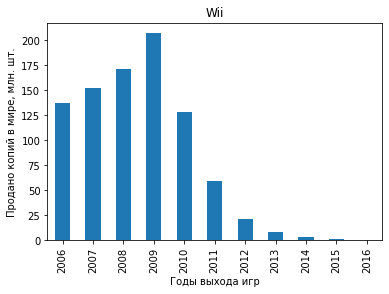

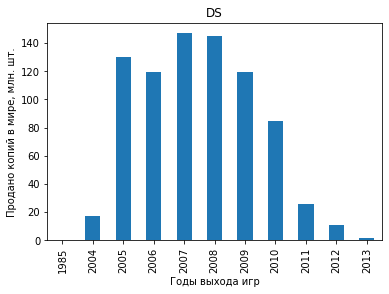

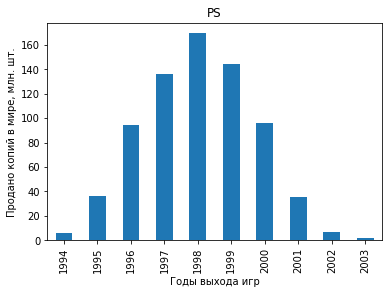

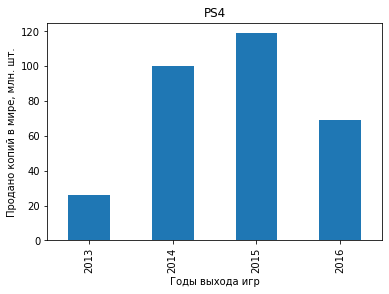

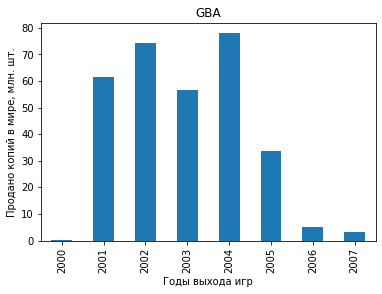

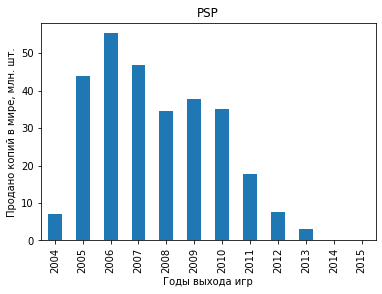

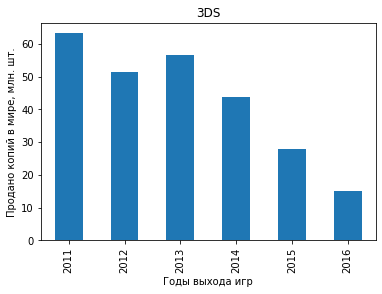

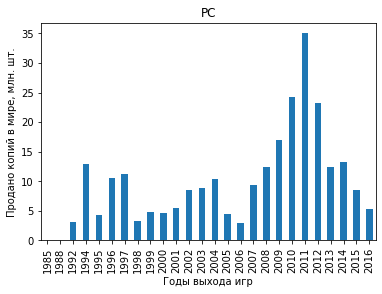

In [26]:
#Cтроим график распределение по годам для каждой платформы
for i in max_sales:
    data.query('platform == @i').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').reset_index().plot(kind='bar', title=i, x='year_of_release', y='all_sales', xlabel='Годы выхода игр', ylabel='Продано копий в мире, млн. шт.', legend=False);

**За какой характерный срок появляются новые и исчезают старые платформы?**

In [27]:
#Создаём список с "периодами жизни" для каждой платформы
life_periods=[]
#Проходимся циклом по списку с популярными платформами, из датасета вычисляем разность между началом  иконцом продаж, до. в список 
for i in max_sales:
    life_periods.append(data.query('platform == @i')['year_of_release'].max() - data.query('platform == @i')['year_of_release'].min())

#Считаем медиану среди "периодов жизни" популярных платформ
pd.Series(life_periods).median()

10.0

In [28]:
#Для каждой платформы найдём "пик продаж" - год, до которого включительно продажи растут, а после начинают падать
peak_list=[]
for i in max_sales:
    peak_list.append(data.query('platform == @i').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').reset_index()['all_sales'].idxmax()+1)
    
pd.Series(peak_list).median()

5.0

**Вывод**: средний "срок жизни" популярной игровой платформы составляет 5 лет. Средний "пик продаж" - год, после которого продажи игр начинают падать - 5-й год после начала продаж. Принимаем года с 2012 по 2016 включительно за **актуальный период**.

In [29]:
#Создаём датасет для актуального периода
data_actual = data.query('year_of_release > 2011').reset_index()

**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

In [30]:
#Сортируем платформы в порядке убывания максимальных продаж за все годы
data_actual.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).reset_index()

,platform,all_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


**Растут или падают продажи на лидирующих платформах?**

In [31]:
#Выбираем платформы с наибольшими суммарными продажами, создаём список с названиями платформ
max_sales = data_actual.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).reset_index()['platform'].to_list()

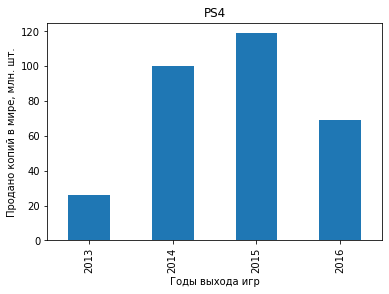

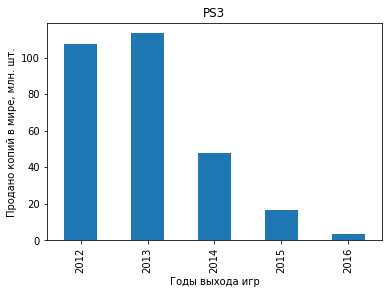

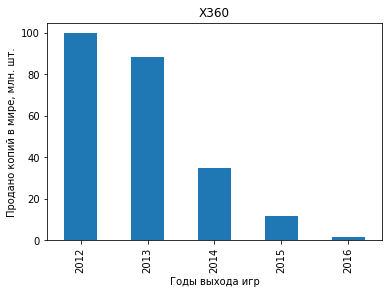

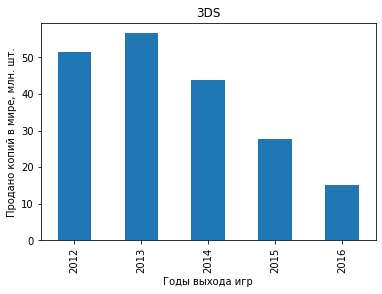

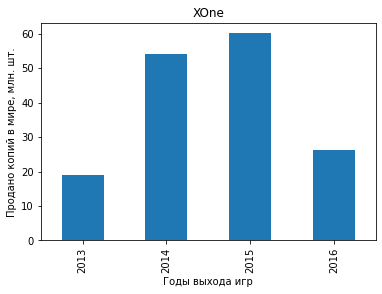

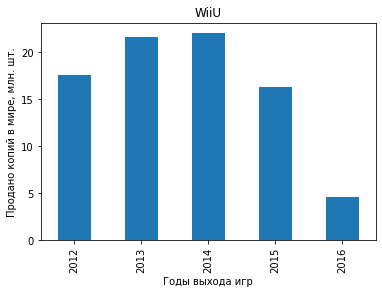

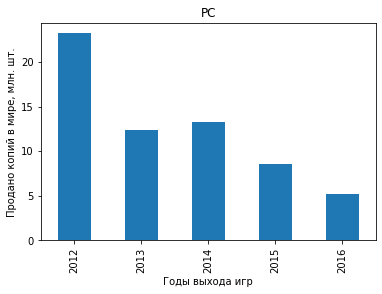

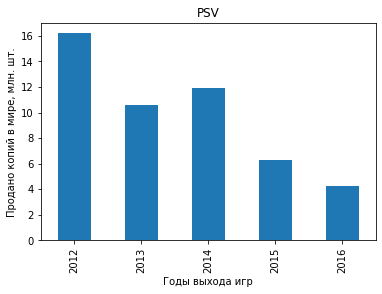

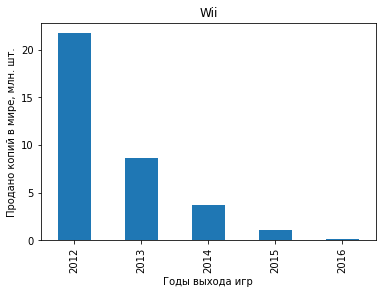

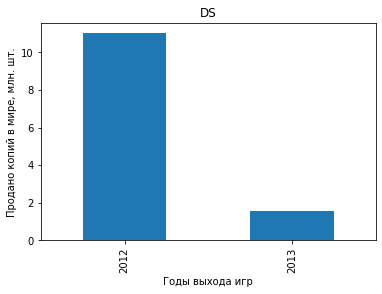

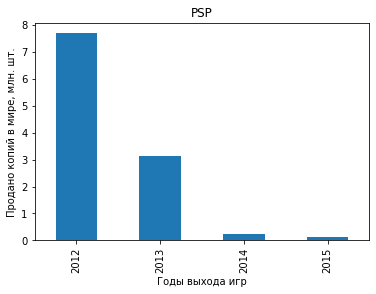

In [32]:
#Cтроим распределение по годам для каждой платформы
for i in max_sales:
    data_actual.query('platform == @i').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').reset_index().plot(kind='bar', title=i, x='year_of_release', y='all_sales', xlabel='Годы выхода игр', ylabel='Продано копий в мире, млн. шт.', legend=False);

In [33]:
#Создадим сводную таблицу, где для каждой платформы выведем суммы продаж за каждый год актуального периода
max_years = pd.pivot_table(data = data_actual[(data_actual['platform'].isin(max_sales))],
                     index = 'year_of_release',
                      columns = 'platform',
                      values = 'all_sales' ,
                      aggfunc='sum'
                     )

max_years

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [34]:
#Создадим список формата [плафтформа, год пика продаж] и датасет на основе этого списка
platform_peak_list = []
for platform in max_years.columns:
    platform_peak_list.append([platform, max_years[platform].idxmax()])
    
platform_peak_data = pd.DataFrame(platform_peak_list)
platform_peak_data.sort_values(1, ascending=False, inplace=True)
platform_peak_data.columns = ['platform', 'peak_year']
platform_peak_data

,platform,peak_year
4,PS4,2015
10,XOne,2015
8,WiiU,2014
0,3DS,2013
3,PS3,2013
1,DS,2012
2,PC,2012
5,PSP,2012
6,PSV,2012
7,Wii,2012


Вывод: самые потенциально прибыльные платформы, которые ещё не достигли пика продаж. Таких платформ не обнаружено, на всех исследуемых платформах продажи уже падают. Выберем первые 5 платформ плюс PC, как "вечную" платформу, в качестве самых потенциально прибыльных.
- Play Station 4 (PS4)
- Xbox One (XOne)
- Nintendo Wii U (WiiU)
- Nintendo 3DS (3DS)
- PlayStation 3 (PS3)
- PC

**Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

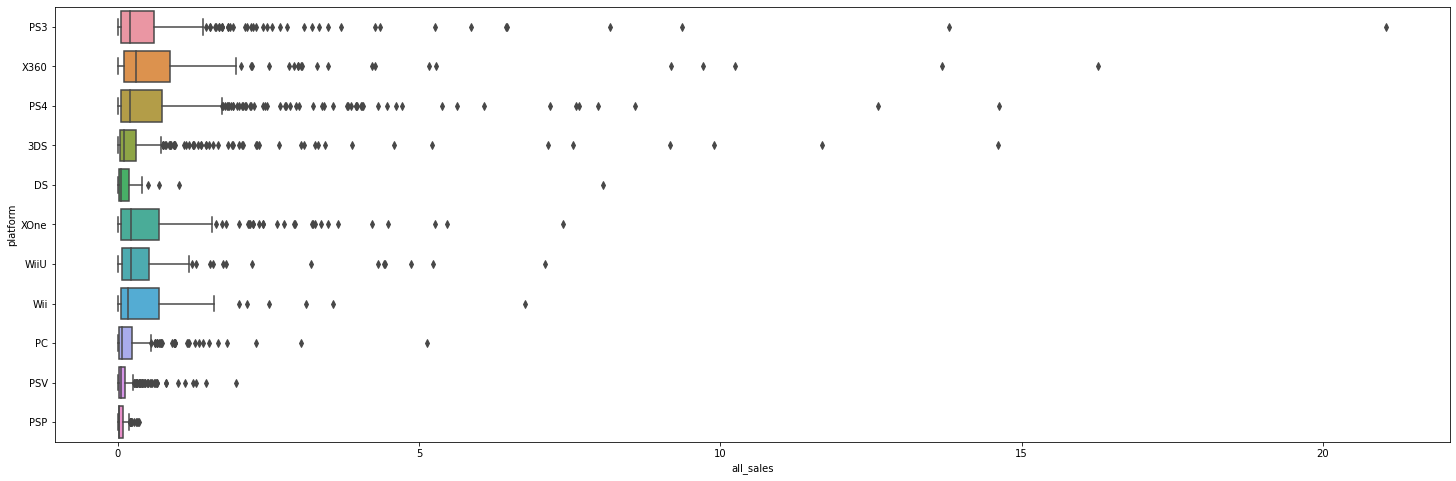

In [35]:
plt.figure(figsize =(25, 8))
sns.boxplot(y="platform", x="all_sales", data=data_actual);

Отдельно выведем области размаха

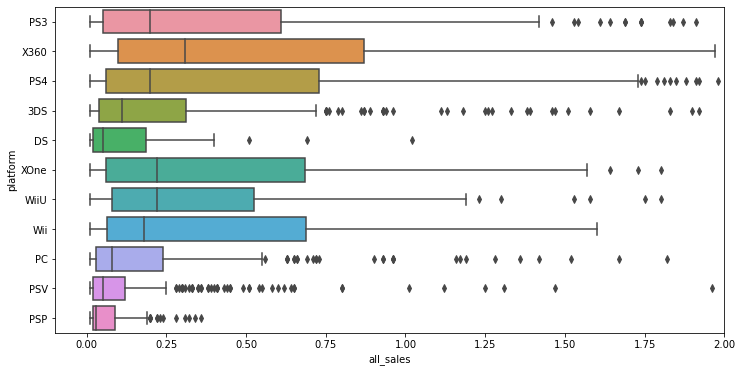

In [36]:
plt.figure(figsize =(12, 6))
boxplot = sns.boxplot(y="platform", x="all_sales", data=data_actual);
boxplot.set_xlim(-0.1, 2);

**Вывод по диаграмме "ящик с усами"**:<br>
- Выделяются максимальные значения кол-ва продаж у платформ X360 (Xbox 360), PS4 (PlayStation 4), XOne (Xbox One) и Wii (Nintendo Wii);
- Для всех платформ медиана ближе к нижней границе кол-ва продаж. Можно сделать вывод, что большинство игр имеют небольшие продажи, а доля игр с высокими продажами мала, и её составляют главным образом очень популярные игр - хиты, кол-во продаж которых значительно превышает среднее. На графиках это выбросы, самое большое количество выбросов - у платформы PS3 (PlayStation 3).

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?<br>
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

AxesSubplot(0.125,0.125;0.775x0.755)


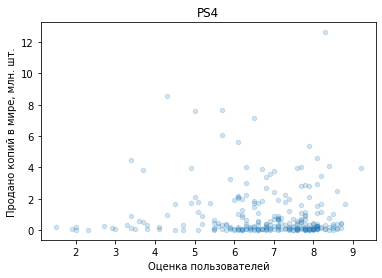

Корреляция продаж и отзывов пользователей:  -0.031957110204556466
AxesSubplot(0.125,0.125;0.775x0.755)


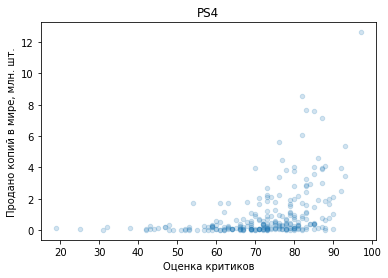

Корреляция продаж и отзывов критиков:  0.4065679020617815
AxesSubplot(0.125,0.125;0.775x0.755)


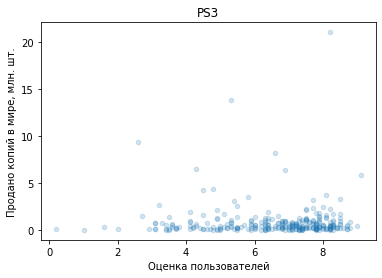

Корреляция продаж и отзывов пользователей:  -0.005143522887113798
AxesSubplot(0.125,0.125;0.775x0.755)


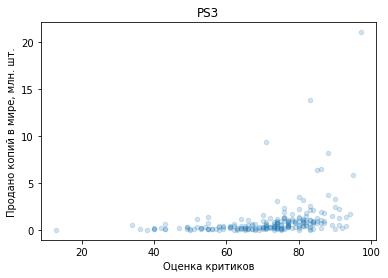

Корреляция продаж и отзывов критиков:  0.33149725926295903
AxesSubplot(0.125,0.125;0.775x0.755)


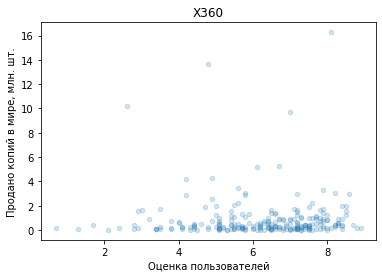

Корреляция продаж и отзывов пользователей:  0.006163978646213352
AxesSubplot(0.125,0.125;0.775x0.755)


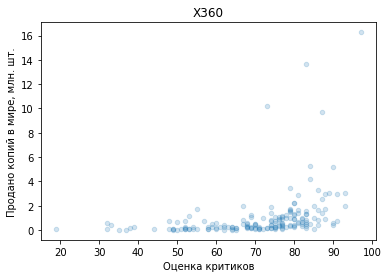

Корреляция продаж и отзывов критиков:  0.3605734888507337
AxesSubplot(0.125,0.125;0.775x0.755)


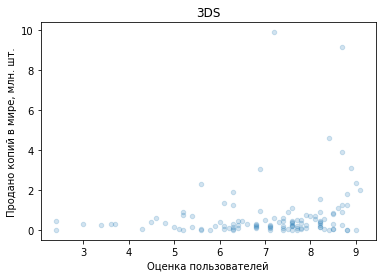

Корреляция продаж и отзывов пользователей:  0.197582634110386
AxesSubplot(0.125,0.125;0.775x0.755)


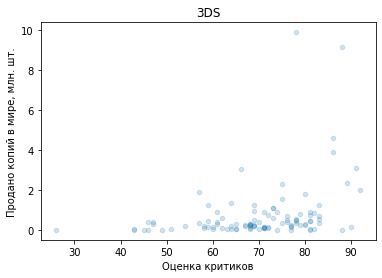

Корреляция продаж и отзывов критиков:  0.32080286953607867
AxesSubplot(0.125,0.125;0.775x0.755)


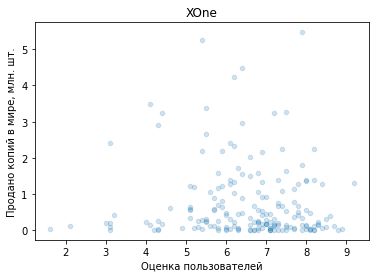

Корреляция продаж и отзывов пользователей:  -0.06892505328279422
AxesSubplot(0.125,0.125;0.775x0.755)


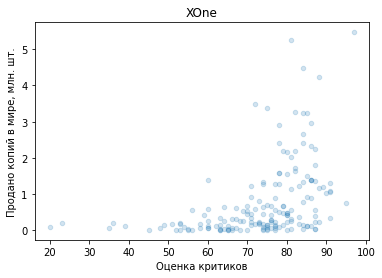

Корреляция продаж и отзывов критиков:  0.4169983280084016
AxesSubplot(0.125,0.125;0.775x0.755)


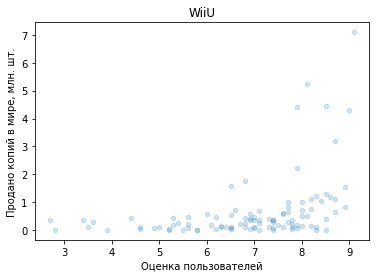

Корреляция продаж и отзывов пользователей:  0.40021902021486144
AxesSubplot(0.125,0.125;0.775x0.755)


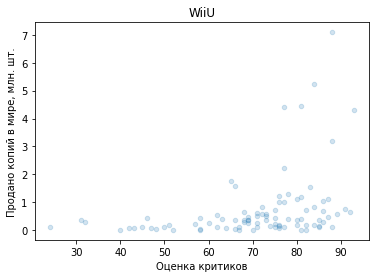

Корреляция продаж и отзывов критиков:  0.34837976012017474
AxesSubplot(0.125,0.125;0.775x0.755)


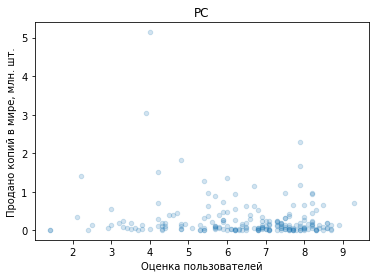

Корреляция продаж и отзывов пользователей:  -0.12186747630735574
AxesSubplot(0.125,0.125;0.775x0.755)


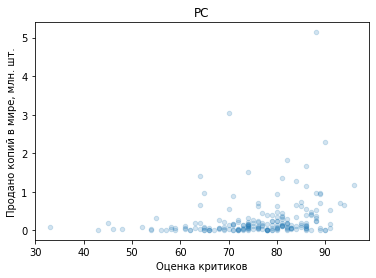

Корреляция продаж и отзывов критиков:  0.23724324311567932
AxesSubplot(0.125,0.125;0.775x0.755)


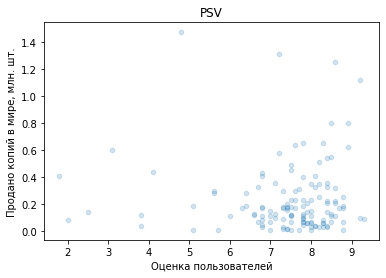

Корреляция продаж и отзывов пользователей:  -0.00433943751431486
AxesSubplot(0.125,0.125;0.775x0.755)


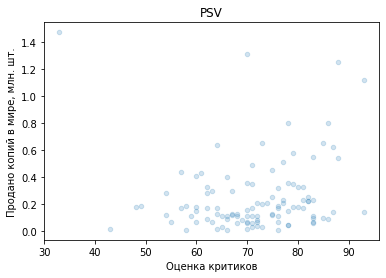

Корреляция продаж и отзывов критиков:  0.09448789929316165
AxesSubplot(0.125,0.125;0.775x0.755)


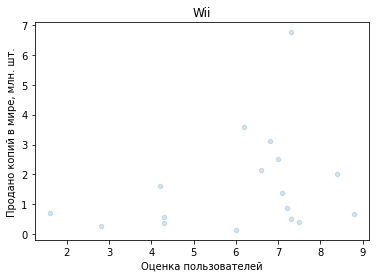

Корреляция продаж и отзывов пользователей:  0.29619680007479526
AxesSubplot(0.125,0.125;0.775x0.755)


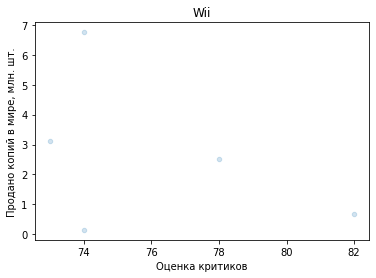

Корреляция продаж и отзывов критиков:  -0.42434130110774954
AxesSubplot(0.125,0.125;0.775x0.755)


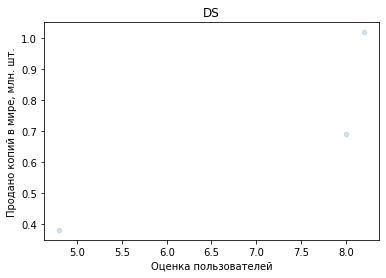

Корреляция продаж и отзывов пользователей:  0.88270872757644
AxesSubplot(0.125,0.125;0.775x0.755)


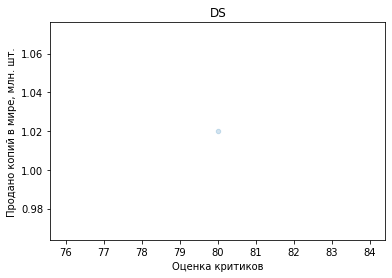

Корреляция продаж и отзывов критиков:  nan
AxesSubplot(0.125,0.125;0.775x0.755)


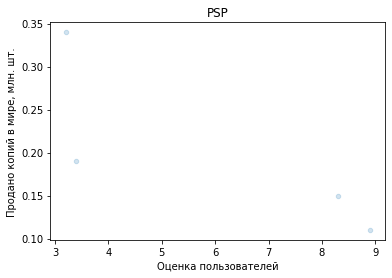

Корреляция продаж и отзывов пользователей:  -0.8023020619393209
AxesSubplot(0.125,0.125;0.775x0.755)


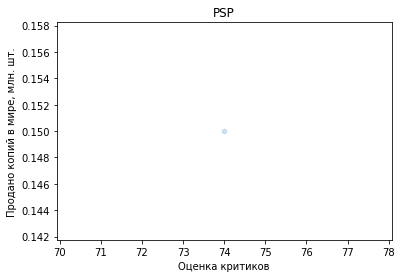

Корреляция продаж и отзывов критиков:  nan


In [37]:
#Строим диаграмму рассеяния и считаем корреляцию между отзывами и кол-вом продаж для каждойплатформы
for platform in max_sales:
    print(data_actual.query('platform==@platform').plot(kind='scatter', x='user_score', y='all_sales', title=platform, xlabel='Оценка пользователей', ylabel='Продано копий в мире, млн. шт.', alpha=0.2))
    plt.show()
    print('Корреляция продаж и отзывов пользователей: ', data_actual.query('platform==@platform')['user_score'].corr(data_actual.query('platform==@platform')['all_sales']))
    print(data_actual.query('platform==@platform').plot(kind='scatter', x='critic_score', y='all_sales', title=platform, xlabel='Оценка критиков', ylabel='Продано копий в мире, млн. шт.',alpha=0.2))
    plt.show()
    print('Корреляция продаж и отзывов критиков: ', data_actual.query('platform==@platform')['critic_score'].corr(data_actual.query('platform==@platform')['all_sales']))

In [38]:
#Создадим таблицу для сравнения корреляции количества продаж и отзывов пользователей и критиков
#Создадим списки с названием платформы, корреляцией кол-ва продаж и отзывов пользователей, кол-ва продаж и отзывов критиков
corr_list=[]
for platform in max_sales:
    platform_list=[]
    user_corr = data_actual.query('platform==@platform')['user_score'].corr(data_actual.query('platform==@platform')['all_sales'])
    user_corr = round(user_corr, 3)
    critic_corr = data_actual.query('platform==@platform')['critic_score'].corr(data_actual.query('platform==@platform')['all_sales'])
    critic_corr = round(critic_corr, 3)
    platform_list.append(platform)
    platform_list.append(user_corr)
    platform_list.append(critic_corr)
    corr_list.append(platform_list)

In [39]:
#Создадим таблицу для сравнения корреляции количества продаж и отзывов пользователей и критиков
corr_data = pd.DataFrame(corr_list)
corr_data.columns = ['platform', 'user_score_corr', 'critic_score_corr']
corr_data

,platform,user_score_corr,critic_score_corr
0,PS4,-0.032,0.407
1,PS3,-0.005,0.331
2,X360,0.006,0.361
3,3DS,0.198,0.321
4,XOne,-0.069,0.417
5,WiiU,0.400,0.348
6,PC,-0.122,0.237
7,PSV,-0.004,0.094
8,Wii,0.296,-0.424
9,DS,0.883,NaN


In [40]:
#Для таблицы corr_data создадим пустой столбец 'max_corr', который для каждой платформы заполним значением 
#'user' или 'critic' в зависимости от того, де корреляция с продажами будет больше
corr_data['max_corr'] = np.nan

#Заполняем столбец 'max_corr' для каждой платформы
for i in range(len(corr_data)):
    if corr_data['user_score_corr'][i] > corr_data['critic_score_corr'][i]:
        corr_data['max_corr'][i] = 'user'
    else:
        corr_data['max_corr'][i] = 'critic'

corr_data

,platform,user_score_corr,critic_score_corr,max_corr
0,PS4,-0.032,0.407,critic
1,PS3,-0.005,0.331,critic
2,X360,0.006,0.361,critic
3,3DS,0.198,0.321,critic
4,XOne,-0.069,0.417,critic
5,WiiU,0.400,0.348,user
6,PC,-0.122,0.237,critic
7,PSV,-0.004,0.094,critic
8,Wii,0.296,-0.424,user
9,DS,0.883,NaN,critic


In [41]:
#Сравним медианы корреляции кол-ва продаж и отзывов пользователей и критиков
print('Средняя корреляция кол-ва продаж игр и отзывов:')
print('- Пользователей:', corr_data['user_score_corr'].median())
print('- Критиков:', corr_data['critic_score_corr'].median())

Средняя корреляция кол-ва продаж игр и отзывов:
- Пользователей: -0.004
- Критиков: 0.331


**Вывод**: Высокие оценки критиков больше влияют на кол-во продаж игр, чем оценки пользователей. Однако, связь не слишком сильная, т.к. коэфф. корреляции в среднем составляет 0,35<br>
Только у платформы 'WiiU' (Nintendo Wii U) зависимость количества продаж от отзывов пользователей выражена сильнее, чем от отзывов критиков, но разница не велика. 

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [42]:
#Создаём таблицу, где для каждого жанра указываем число выпущенных игр и кол-во продаж
genres = data_actual.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum']).reset_index()
genres.columns = ['genre', 'games', 'all_sales']
genres

,genre,games,all_sales
0,Action,1031,441.12
1,Adventure,302,29.43
2,Fighting,109,44.49
3,Misc,192,85.04
4,Platform,85,61.00
5,Puzzle,28,4.89
6,Racing,115,53.50
7,Role-Playing,370,192.80
8,Shooter,235,304.73
9,Simulation,80,35.12


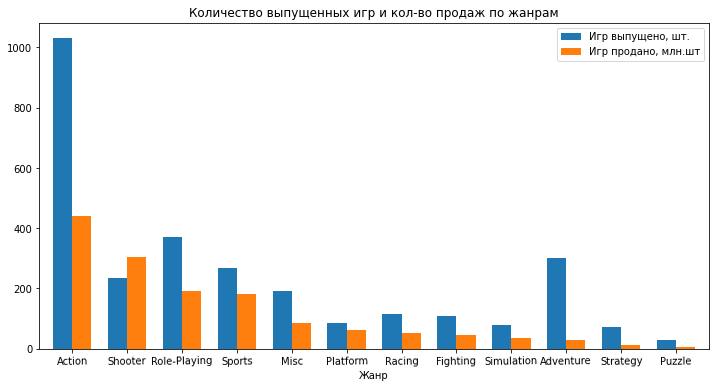

In [43]:
#Выводим график кол-ва вышедших игр и кол-ва продаж для каждого жанра
genres.sort_values('all_sales', ascending=False).plot(kind='bar', y=['games', 'all_sales'], x='genre', title='Количество выпущенных игр и кол-во продаж по жанрам', xlabel='Жанр', label = ['Игр выпущено, шт.', 'Игр продано, млн.шт'], rot=True, width=0.7, figsize=(12, 6));

**Вывод**: продажи по жанрам распределены неравномерно. За последние 10 лет Самое большое кол-во продаж - в жанре 'Action', далее идёт жанр 'Shooter', на третьем месте - жанры 'Role-Playing' и 'Sports', разница у них не большая. Самое низкое количество продаж - у игр жанра 'Puzzle'.

In [44]:
#Посчитаем отношение кол-ва проданных игр к количеству выпущенных для каждого жанра
ratio_list=[]
for i in range(len(genres)):
    genre_ratio=[]
    genre_ratio.append(genres['genre'][i])
    genre_ratio.append(genres['all_sales'][i]/genres['games'][i])
    ratio_list.append(genre_ratio)

In [45]:
#Создаём таблицу с отношением кол-ва проданных игр к количеству выпущенных для каждого жанра
genres_ratio = pd.DataFrame(ratio_list)
genres_ratio.columns=['genre', 'sales/games']
#Сортируем по отношению продажи/игры
genres_ratio.sort_values('sales/games', ascending=False, inplace=True)
genres_ratio.reset_index(drop=True, inplace=True)
genres_ratio

,genre,sales/games
0,Shooter,1.296723
1,Platform,0.717647
2,Sports,0.675634
3,Role-Playing,0.521081
4,Racing,0.465217
5,Misc,0.442917
6,Simulation,0.439000
7,Action,0.427856
8,Fighting,0.408165
9,Strategy,0.187887


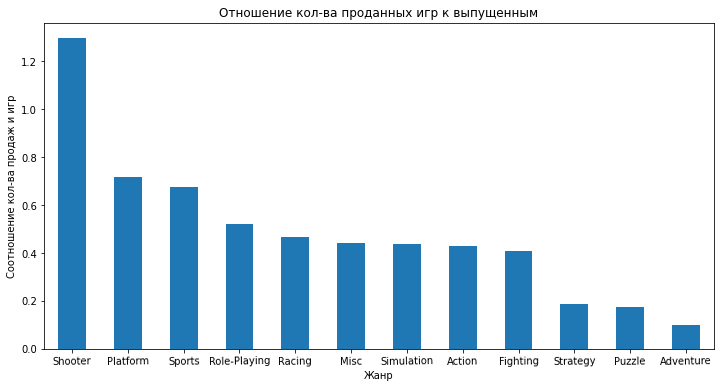

In [46]:
#Строим график отношения выпущенных игр к кол-ву проданных копий
genres_ratio.sort_values('sales/games', ascending=False).plot(kind='bar', x='genre', y='sales/games', title='Отношение кол-ва проданных игр к выпущенным', xlabel='Жанр', ylabel='Соотношение кол-ва продаж и игр', rot=True, legend=False, figsize=(12, 6));

**Вывод**: Самым прибыльным жанром можно считать жанр 'Shooter', здесь самое высокое соотношение кол-ва проданных копий игр к кол-ву выпущенных игр. На 2-м месте жанр 'Platform', на 3-м - 'Sports'.

### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

***Портрет пользователя региона Северная Америка (NA)***

In [47]:
#Cамые популярные платформы, ТОП - 5. Берём данные за последние 5 лет.
na_platforms = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head()

#Добавляем столбец с долей продаж среди ТОП-5 - платформ
na_platforms['ratio'] = na_platforms['na_sales']/na_platforms['na_sales'].sum()
na_platforms

,platform,na_sales,ratio
0,X360,140.05,0.279764
1,PS4,108.74,0.217219
2,PS3,103.38,0.206512
3,XOne,93.12,0.186017
4,3DS,55.31,0.110487


**Вывод**:<br>
5 самых поппулярных игровых платформ в Северной Америке за последние 5 лет:
- Xbox 360 (X360) - доля продаж 28%
- Play Station 4 (PS4) - 21.8%
- Play Station 3 (PS3) - 20.7%
- Xbox One (XOne) - 18.6%
- Nintendo 3 DS (3DS) - 11%

Найдём самые популярные жанры в регионе

In [48]:
#Cамые популярные жанры
na_genres = data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head()
na_genres

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


Вероятно, популярность жанра связана с популярностью платформы. Проверим самые популярные жанры у ТОП-5 платформ.

In [49]:
#Составим список 5 самых популярных жанров, начиная с самого популярного, для 5 самых популярных платформ
platforms_genres=[]
for platform in na_platforms['platform'].unique():
    genres_list = list(data_actual.query('platform==@platform').pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head()['genre'].unique())
    genres_list.insert(0, platform)
    platforms_genres.append(genres_list)

In [50]:
#Создадим таблицу с самыми популярными жанрами для каждой платформы
platforms_genres_data = pd.DataFrame(platforms_genres)
platforms_genres_data.columns=['platform', 'place_1', 'place_2', 'place_3', 'place_4', 'place_5']
platforms_genres_data

,platform,place_1,place_2,place_3,place_4,place_5
0,X360,Action,Shooter,Sports,Misc,Role-Playing
1,PS4,Action,Shooter,Sports,Role-Playing,Fighting
2,PS3,Action,Shooter,Sports,Role-Playing,Fighting
3,XOne,Shooter,Action,Sports,Role-Playing,Misc
4,3DS,Role-Playing,Action,Platform,Simulation,Fighting


In [51]:
#Создаём список 5 самых популярных жанров для 5 самых популярных платформ и датасет по этому списку
platforms_genres_list=[]
for place in platforms_genres_data.columns[1:]:
    platforms_genres_list.append(platforms_genres_data[place].value_counts().idxmax())
    
top_platrorms_genres = pd.DataFrame(platforms_genres_list)
top_platrorms_genres.columns = ['platrorms_genres']
top_platrorms_genres

,platrorms_genres
0,Action
1,Shooter
2,Sports
3,Role-Playing
4,Fighting


**Вывод**: 
5 самых поппулярных жанров в регионе за последние 5 лет:
- Action
- Shooter
- Sports
- Role-Playing
- Fighting

In [52]:
#Добавим к таблице 'na_genres' столбец 'platrorms_genres' из таблицы 'top_platrorms_genres' для сравнения
na_genres['platrorms_genres'] = top_platrorms_genres['platrorms_genres']
na_genres

,genre,na_sales,platrorms_genres
0,Action,177.84,Action
1,Shooter,144.77,Shooter
2,Sports,81.53,Sports
3,Role-Playing,64.00,Role-Playing
4,Misc,38.19,Fighting


**Вывод**: Популярность жанра зависит от популярности игровой платформы в большинстве случаев.

In [53]:
#Влияние рейтинга ESRB на продажи в регионе
na_rating = data_actual.pivot_table(index='rating', values='na_sales', aggfunc=['count', 'sum'])
na_rating.columns = ['games', 'na_sales']
na_rating.sort_values('na_sales', ascending=False, inplace=True)
na_rating.reset_index(inplace=True)
na_rating

,rating,games,na_sales
0,M,498,231.57
1,E,395,114.37
2,Отсутствует,1275,103.31
3,E10+,306,75.70
4,T,412,66.02


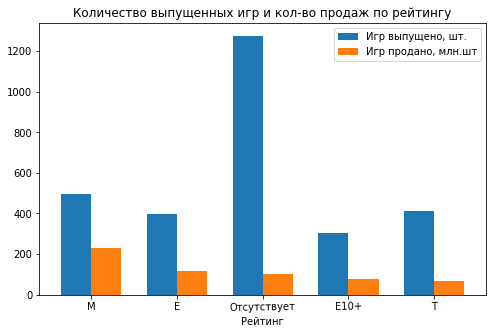

In [54]:
#График количества выпущенных игр и продаж в регионе, последние 2 значения исключаем
na_rating[:5].plot(kind='bar', y=['games', 'na_sales'], x='rating', title='Количество выпущенных игр и кол-во продаж по рейтингу', xlabel='Рейтинг', label = ['Игр выпущено, шт.', 'Игр продано, млн.шт'], rot=True, width=0.7, figsize=(8, 5));

**Вывод**: На первом месте по продажам игры с рейтингом 'M', на втором месте - с рейтингом 'M'. На третьем месте - игры с рейтингом 'E10+', на четвёртом - 'T'. Игры без рейтинга не учитываем.

***Портрет пользователя региона Европа (EU)***

In [55]:
#Самые популярные платформы, ТОП-5
eu_platforms = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head()

#Добавляем столбец с долей продаж среди ТОП-5 - платформ
eu_platforms['ratio'] = eu_platforms['eu_sales']/eu_platforms['eu_sales'].sum()
eu_platforms

,platform,eu_sales,ratio
0,PS4,141.09,0.338589
1,PS3,106.86,0.256443
2,X360,74.52,0.178834
3,XOne,51.59,0.123806
4,3DS,42.64,0.102328


**Вывод**:<br>
5 самых поппулярных игровых платформ в Европе за последние 5 лет:
- Play Station 4 (PS4) - доля продаж 33.9%
- Play Station 3 (PS3) - 25.7%
- Xbox 360 (X360) - 17.9%
- Xbox One (XOne) - 12.4%
- Nintendo 3 DS (3DS) - 10%

In [56]:
#Самые популярные жанры в EU
eu_genres = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head()
eu_genres

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


**Вывод**: 
5 самых поппулярных жанров в регионе за последние 5 лет:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

Вероятно, популярность жанра связана с популярностью платформы. Проверим самые популярные жанры у ТОП-5 платформ.

In [57]:
#Составим список 5 самых популярных жанров, начиная с самого популярного, для 5 самых популярных платформ
platforms_genres=[]
for platform in eu_platforms['platform'].unique():
    genres_list = list(data_actual.query('platform==@platform').pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head()['genre'].unique())
    genres_list.insert(0, platform)
    platforms_genres.append(genres_list)

In [58]:
#Создадим таблицу с самыми популярными жанрами для каждой платформы
platforms_genres_data = pd.DataFrame(platforms_genres)
platforms_genres_data.columns=['platform', 'place_1', 'place_2', 'place_3', 'place_4', 'place_5']
platforms_genres_data

,platform,place_1,place_2,place_3,place_4,place_5
0,PS4,Action,Shooter,Sports,Role-Playing,Racing
1,PS3,Action,Shooter,Sports,Racing,Role-Playing
2,X360,Action,Shooter,Sports,Racing,Misc
3,XOne,Shooter,Action,Sports,Racing,Role-Playing
4,3DS,Role-Playing,Action,Platform,Simulation,Misc


In [59]:
#Создаём список 5 самых популярных жанров для 5 самых популярных платформ и датасет по этому списку
platforms_genres_list=[]
for place in platforms_genres_data.columns[1:]:
    platforms_genres_list.append(platforms_genres_data[place].value_counts().idxmax())
    
top_platrorms_genres = pd.DataFrame(platforms_genres_list)
top_platrorms_genres.columns = ['platrorms_genres']
top_platrorms_genres

,platrorms_genres
0,Action
1,Shooter
2,Sports
3,Racing
4,Role-Playing


In [60]:
#Добавим к таблице 'na_genres' столбец 'platrorms_genres' из таблицы 'top_platrorms_genres' для сравнения
eu_genres['platrorms_genres'] = top_platrorms_genres['platrorms_genres']
eu_genres

,genre,eu_sales,platrorms_genres
0,Action,159.34,Action
1,Shooter,113.47,Shooter
2,Sports,69.09,Sports
3,Role-Playing,48.53,Racing
4,Racing,27.29,Role-Playing


**Вывод**: Популярность жанра зависит от популярности игровой платформы в большинстве случаев

In [61]:
#Влияние рейтинга ESRB на продажи в регионе
eu_rating = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc=['count', 'sum'])
eu_rating.columns = ['games', 'eu_sales']
eu_rating.sort_values('eu_sales', ascending=False, inplace=True)
eu_rating.reset_index(inplace=True)
eu_rating

,rating,games,eu_sales
0,M,498,193.96
1,E,395,113.03
2,Отсутствует,1275,91.50
3,E10+,306,55.37
4,T,412,52.96


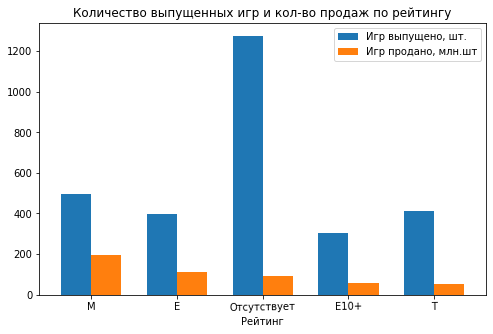

In [62]:
#График количества выпущенных игр и продаж в регионе
eu_rating[:5].sort_values('eu_sales', ascending=False).plot(kind='bar', y=['games', 'eu_sales'], x='rating', title='Количество выпущенных игр и кол-во продаж по рейтингу', xlabel='Рейтинг', label = ['Игр выпущено, шт.', 'Игр продано, млн.шт'], rot=True, width=0.7, figsize=(8, 5));

**Вывод**: На первом месте по продажам игры с рейтингом 'M', на втором месте - с рейтингом 'E'. На третьем месте - игры с рейтингом 'E10+', на четвёртом - 'T'. Игры без рейтинга не учитываем.

**Портрет пользователя региона Япония (JP)**

In [63]:
#Самые популярные платформы
jp_platforms = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head()

#Добавляем столбец с долей продаж среди ТОП-5 - платформ
jp_platforms['ratio'] = jp_platforms['jp_sales']/jp_platforms['jp_sales'].sum()
jp_platforms

,platform,jp_sales,ratio
0,3DS,87.79,0.507193
1,PS3,35.29,0.203882
2,PSV,21.04,0.121555
3,PS4,15.96,0.092206
4,WiiU,13.01,0.075163


**Вывод**:<br>
5 самых поппулярных игровых платформ в Японии за последние 5 лет:
- Nintendo 3 DS (3DS) - доля продаж 50.7%
- Play Station 3 (PS3) - 20.4%
- Play Station Vita (PSV) - 12.1%
- Play Station 4 (PS4) - 9.2%
- Nintendo Wii U (Wii) - 7.5%

In [64]:
#Самые популярные жанры в JP
jp_genres = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head()
jp_genres

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


**Вывод**: 
5 самых поппулярных жанров в регионе за последние 5 лет:
- Role-Playing
- Action
- Misc
- Simulation
- Fighting

Вероятно, популярность жанра связана с популярностью платформы. Проверим самые популярные жанры у ТОП-5 платформ.

In [65]:
#Составим список 5 самых популярных жанров, начиная с самого популярного, для 5 самых популярных платформ в JP
platforms_genres=[]
for platform in jp_platforms['platform'].unique():
    genres_list = list(data_actual.query('platform==@platform').pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head()['genre'].unique())
    genres_list.insert(0, platform)
    platforms_genres.append(genres_list)

In [66]:
#Создадим таблицу с самыми популярными жанрами для каждой платформы в JP
platforms_genres_data = pd.DataFrame(platforms_genres)
platforms_genres_data.columns=['platform', 'place_1', 'place_2', 'place_3', 'place_4', 'place_5']
platforms_genres_data

,platform,place_1,place_2,place_3,place_4,place_5
0,3DS,Role-Playing,Action,Simulation,Misc,Platform
1,PS3,Action,Role-Playing,Shooter,Fighting,Sports
2,PSV,Role-Playing,Action,Misc,Adventure,Sports
3,PS4,Action,Role-Playing,Shooter,Sports,Fighting
4,WiiU,Platform,Misc,Shooter,Racing,Action


In [67]:
#Создаём список 5 самых популярных жанров для 5 самых популярных платформ и датасет по этому списку
platforms_genres_list=[]
for place in platforms_genres_data.columns[1:]:
    platforms_genres_list.append(platforms_genres_data[place].value_counts().idxmax())
    
top_platrorms_genres = pd.DataFrame(platforms_genres_list)
top_platrorms_genres.columns = ['platrorms_genres']
top_platrorms_genres

,platrorms_genres
0,Role-Playing
1,Action
2,Shooter
3,Misc
4,Sports


Из таблицы с самыми популярными жанрами для каждой платформы видно, что жанры 'Rolse-Playing' и 'Shooter' делят 1-е и 2-е место. 4-е место этим способом определить не получилось, т.к. у всех 5-и платформ на этом месте разные жанры. Подправим таблицу вручную.

In [68]:
top_platrorms_genres['platrorms_genres'] = ['Role-Playing', 'Action', 'Shooter', '', 'Sports']
top_platrorms_genres

,platrorms_genres
0,Role-Playing
1,Action
2,Shooter
3,
4,Sports


In [69]:
#Добавим к таблице 'na_genres' столбец 'platrorms_genres' из таблицы 'top_platrorms_genres' для сравнения
jp_genres['platrorms_genres'] = top_platrorms_genres['platrorms_genres']
jp_genres

,genre,jp_sales,platrorms_genres
0,Role-Playing,65.44,Role-Playing
1,Action,52.80,Action
2,Misc,12.86,Shooter
3,Simulation,10.41,
4,Fighting,9.44,Sports


**Вывод**: Зависимость популярности жанра от популярности платформы выявлена только для первого и второго самых популярных жанров. Можно сделать вывод, что для большинства жанров зависимость популярности жанра не сильно связаан с популярностью платформы.

Изучим влияние рейтинга ESRB на продажи в регионе

In [70]:
#Влияние рейтинга ESRB на продажи в регионе
jp_rating = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc=['count', 'sum'])
jp_rating.columns = ['games', 'jp_sales']
jp_rating.sort_values('jp_sales', ascending=False, inplace=True)
jp_rating.reset_index(inplace=True)
jp_rating

,rating,games,jp_sales
0,Отсутствует,1275,108.84
1,E,395,28.33
2,T,412,26.02
3,M,498,21.20
4,E10+,306,8.19


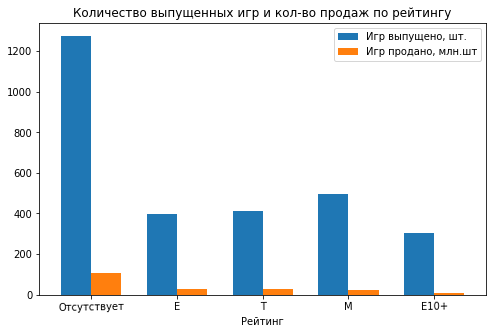

In [71]:
#График количества выпущенных игр и продаж в регионе
jp_rating[:5].sort_values('jp_sales', ascending=False).plot(kind='bar', y=['games', 'jp_sales'], x='rating', title='Количество выпущенных игр и кол-во продаж по рейтингу', xlabel='Рейтинг', label = ['Игр выпущено, шт.', 'Игр продано, млн.шт'], rot=True, width=0.7, figsize=(8, 5));

**Вывод**: На первом месте по кол-ву проданных копий игры с рейтингом 'E', на втором с небольшим различием - с рейтингом 'T'. На третьем месте игры с рейтингом 'M'. На 4-м месте игры с рейтингом 'E10+'.

### Проверка гипотез

**Гипотеза №1<br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Применяем метод для проверки гипотезы о равенстве средних двух генеральных совокупностей<br>
- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - нулевая гипотеза
- "Средние пользовательские рейтинги платформ Xbox One и PC разные" - альтернативная гипотеза

In [72]:
#Выделим из таблицы  генеральные совокупности:
#"Пользовательские рейтинги Xbox One"
xone_user_score = data_actual.loc[(data_actual['platform'] == 'XOne') & ~(data_actual['user_score'].isna()), 'user_score']

#"Пользовательские рейтинги PC"
pc_user_score = data_actual.loc[(data_actual['platform'] == 'PC') & ~(data_actual['user_score'].isna()), 'user_score']

#Посчитаем кол-во значений в каждой ген.совокупности
print('Размер ген.сов. "Пользовательские рейтинги Xbox One":', xone_user_score.count())
print('Размер ген.сов. "Пользовательские рейтинги PC":', pc_user_score.count())

#Посчитаем дисперсию каждой ген.совокупности
print('Дисперсия ген.сов. "Пользовательские рейтинги Xbox One":', np.var(xone_user_score))
print('Дисперсия ген.сов. "Пользовательские рейтинги PC":', np.var(pc_user_score))

Размер ген.сов. "Пользовательские рейтинги Xbox One": 182
Размер ген.сов. "Пользовательские рейтинги PC": 206
Дисперсия ген.сов. "Пользовательские рейтинги Xbox One": 1.8965188383045526
Дисперсия ген.сов. "Пользовательские рейтинги PC": 2.7569952398906588


Размеры генеральных совокупностей разные, поэтому при проверке гипотезы будем считать, что их дисперсии не равны

In [73]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Cредние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются

**Гипотеза №2<br>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Применяем метод для проверки гипотезы о равенстве средних двух генеральных совокупностей<br>
- "Средние пользовательские рейтинги жанров Action и Sports одинаковые" - нулевая гипотеза.
- "Средние пользовательские рейтинги жанров Action и Sports разные" - альтернативная гипотеза.

In [74]:
#Выделим из таблицы  генеральные совокупности:
#Пользовательские рейтинги жанра Action
action_user_score = data_actual.loc[data_actual['genre'] == 'Action', 'user_score']

#Пользовательские рейтинги жанра Sports
sports_user_score = data_actual.loc[data_actual['genre'] == 'Sports', 'user_score']

#Посчитаем кол-во значений в каждой ген.совокупности
print('Размер ген.сов. "Пользовательские рейтинги жанра Action":', action_user_score.count())
print('Размер ген.сов. "Пользовательские рейтинги жанра Sports":', sports_user_score.count())

#Посчитаем дисперсию каждой ген.совокупности
print('Дисперсия ген.сов. "Пользовательские рейтинги жанра Action":', np.var(action_user_score))
print('Дисперсия ген.сов. "Пользовательские рейтинги жанра Sports":', np.var(sports_user_score))

Размер ген.сов. "Пользовательские рейтинги жанра Action": 523
Размер ген.сов. "Пользовательские рейтинги жанра Sports": 195
Дисперсия ген.сов. "Пользовательские рейтинги жанра Action": 1.8854720340439224
Дисперсия ген.сов. "Пользовательские рейтинги жанра Sports": 3.0073882971729127


In [75]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется больше него - отвергнем гипотезу

results = st.ttest_ind(action_user_score, sports_user_score, nan_policy='omit', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод**: Cредние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

### Общий вывод

**1.Количетво выпущенных игр в разные годы**<br>
**Исследование**:
Для каждого года было подсчитано количество выпущенных игр, построена столбчаатя диаграмма.
<br>
**Вывод**: Начиная с 1994 года наблюдается быстрое увеличение выпуска игр с каждым годом. Пик количества выпущенных игр приходится на 2008 и 2009 года. Затем следует довольно резкйи спад с каждым годом. В настоящий момент (2016 год) количество выпущенных игр вернулось на показатели 2001 года.
<br><br>
**2.Период актуальности игровых платформ**<br>
**Исследование**: Для каждой платформы была посчитана разница между годом начала продаж и последним годом продаж. Затем была вычислена медиана "срока жизни" для всех платформ. Также для каждой платформы был вычислен год с максимальными продажами.
<br>
**Вывод**:Cредний "срок жизни" популярной игровой платформы составляет 10 лет. Средний "пик продаж" - год, после которого продажи игр начинают падать - 5-й год после начала продаж. Для планирования рекламной кампании на 2017 год для исследования был взятпериод  с 2007 г. по 2016 г. включительно.
<br><br>
**3.Потенциально прибыльные платформы**<br>
**Исследование**: Были выбраны платформы с максимальными продажами за последние 5 лет. Для каждой платформы был найден год "пика продаж". В качестве самых потенциально прибыльных были выбраны платформы с самым близким к настоящему годом "пика продаж".
<br>
**Вывод**: самые потенциально прибыльные платформы, которые ещё не достигли пика продаж. Таких платформ не обнаружено, на всех исследуемых платформах продажи уже падают. Выберем первые 5 платформ плюс PC, как "вечную" платформу, в качестве самых потенциально прибыльных.
- Play Station 4 (PS4)
- Xbox One (XOne)
- Nintendo Wii U (WiiU)
- Nintendo 3DS (3DS)
- PlayStation 3 (PS3)
- PC

<br><br>
**4.Влияние отзывов пользователей и критиков на продажи**<br>
**Исследование**: Для каждой платформы была посчитана корреляция кол-ва продаж между отзывами пользователей и критиков. После сравнения коэффициентов корреляции был сделан следующий вывод.
<br>
**Вывод**: Высокие оценки критиков больше влияют на кол-во продаж игр, чем оценки пользователей. Однако, связь не слишком сильная, т.к. коэфф. корреляции отзывов критиков и продаж в среднем составляет 0,35 для всех платформ.<br>
Только у платформы 'WiiU' (Nintendo Wii U) зависимость количества продаж от отзывов пользователей выражена сильнее, чем от отзывов критиков, но разница не велика.
<br><br>
**5.Распределение продаж игр по жанрам**<br>
**Исследование**:
Для каждого жанра были подсчитанна сумма продаж всех игр на всех платформах. Также для каждого жанра было вычислено соотношение между количеством выпущенных и проданных игр.
<br>
**Вывод**: Продажи игр по жанрам распределены неравномерно. За последние 10 лет Самое большое кол-во продаж - в жанре 'Action', далее идут жанры 'Shooter' и 'Sports', на третьем месте - жанры 'Misc' и 'Role-Playing'. Самое низкое количество продаж - у игр жанра 'Strategy'.<br>
Самым прибыльным жанром можно считать жанр 'Shooter', здесь самое высокое соотношение кол-ва проданных копий игр к кол-ву выпущенных игр. На 2-м месте жанр 'Platform', на 3-м - 'Sports'.
<br><br>

**6. Портрет пользователя в отдельном регионе мира**<br>
**Исследование**: Для каждого региона был найдены:
- Самые популярные платформы по максимальному числу проданных игр;
- Самые популярные жанры по максимальному числу проданных игр;
- Зависимость популярности жанра от игровой платформы с помощью найденных выше данных;
- Количество проданных копий игр в каждом рейтинге.
<br>

**Вывод**:
<center><b>Севераня америка</b></center>

|<center>Место</center>|<center>Платформа</center>|<center>Жанр</center>|
|------------------|---------------------|------------------|
|<center>1</center>|<center>Xbox 360</center>|<center>Action</center>|
|<center>2</center>|<center>Play Station 4</center>|<center>Shooter</center>|
|<center>3</center>|<center>Play Station 3</center>|<center>Sports</center>|
|<center>4</center>|<center>Xbox One</center>|<center>Role-Playing</center>|
|<center>5</center>|<center>Nintendo 3 DS</center>|<center>Fighting</center>|

В данном регионе популярность жанра главным образом зависит от популярности игровой платформы, на которой этот жанр преобладает. 

**Влияние рейтинга ESRB на продажи в регионе**<br>
На первом месте по продажам игры с рейтингом **E**, на втором месте - с рейтингом **M**. Хотя разница между кол-вом проданных копий у этих рейтингов не велика, игр с рейтингом **E** было выпущено почти в 2 раза больше. Можно сделать вывод, что игры с рейтингом **M** лучше продаются.<br> 
На третьем месте - игры с рейтингом **T**, на четвёртом - **E10+**. 

<center><b>Европа</b></center>

|<center>Место</center>|<center>Платформа</center>|<center>Жанр</center>|
|------------------|---------------------|------------------|
|<center>1</center>|<center>Play Station 4</center>|<center>Action</center>|
|<center>2</center>|<center>Play Station 3</center>|<center>Shooter</center>|
|<center>3</center>|<center>Xbox 360</center>|<center>Sports</center>|
|<center>4</center>|<center>Xbox One</center>|<center>Role-Playing</center>|
|<center>5</center>|<center>Nintendo 3 DS</center>|<center>Racing</center>|

В данном регионе популярность жанра главным образом зависит от популярности игровой платформы, на которой этот жанр преобладает. 

**Влияние рейтинга ESRB на продажи в регионе**<br>
На первом месте по продажам игры с рейтингом **E**, на втором месте - с рейтингом **M**. Хотя разницы между кол-вом проданных копий у этих рейтингов практически нет, игр с рейтингом **E** было выпущено почти в 2 раза больше. Можно сделать вывод, что игры с рейтингом **M** лучше продаются.<br>
На третьем месте - игры с рейтингом **T**, на четвёртом - **E10+**. 

<center><b>Япония</b></center>

|<center>Место</center>|<center>Платформа</center>|<center>Жанр</center>|
|------------------|---------------------|------------------|
|<center>1</center>|<center>Nintendo 3 DS</center>|<center>Role-Playing</center>|
|<center>2</center>|<center>Play Station 3</center>|<center>Action</center>|
|<center>3</center>|<center>Play Station Vita</center>|<center>Misc</center>|
|<center>4</center>|<center>Play Station 4</center>|<center>Simulation</center>|
|<center>5</center>|<center>Nintendo Wii U</center>|<center>Fighting</center>|

В данном регионе зависимость популярности жанра от популярности платформы выявлена только для первого и второго самых популярных жанров. Можно сделать вывод, что для большинства жанров зависимость популярности жанра не сильно связаан с популярностью платформы.

**Влияние рейтинга ESRB на продажи в регионе**<br>
На первом месте по кол-ву проданных копий игры с рейтингом **E**, на втором с небольшим различием - с рейтингом **T**. На третьем месте игры с рейтингом **M**. На 4-м месте игры с рейтингом **E10+**.

**7. Были подтверждены гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Рекмоендации для планирования рекламной компании на 2017:**<br>
**Самые потенциально прибыльные платформы**:<br>
- Play Station 4 (PS4)
- Xbox One (XOne)
- Nintendo Wii U (WiiU)
- Nintendo 3DS (3DS)
- PlayStation 3 (PS3)
- PC

<center><b>Самые популярные жанры<b></center>

|<center>Место по кол-ву продаж</center>|<center>Жанр</center>|<center>Отношение кол-ва продаж к кол-ву игр</center>|
|------------------|---------------------|------------------|
|<center>1</center>|<center>Action</center>|<center>0.43</center>|
|<center>2</center>|<center>Shooter</center>|<center>1.3</center>|
|<center>3</center>|<center>Role-Playing</center>|<center>0.52</center>|
|<center>4</center>|<center>Sports</center>|<center>0.68</center>|
|<center>5</center>|<center>Misc</center>|<center>0.44</center>|
|<center>6</center>|<center>Platform</center>|<center>0.72</center>|
|<center>7</center>|<center>Racing</center>|<center>0.47</center>|
|<center>8</center>|<center>Fighting</center>|<center>0.41</center>|
|<center>9</center>|<center>Simulation</center>|<center>0.44</center>|
|<center>10</center>|<center>Adventure</center>|<center>0.1</center>|